In [1]:
from IPython.display import Image
import pandas as pd

In [2]:
# 1. 釐清每個資料欄位定義


In [3]:
# 2. 處理遺失值
    # 刪除？(通常超過 60% 就會刪除)
        #缺點：會導致資訊丟失。不是完全隨機缺失，若採用簡單刪除法就會使得估計係數出現偏誤。
    # 補值？
        #給定一個固定值去填補遺失值
        #由後往前補值 (時間性相關適用)
        #由前往後補值 (時間性相關適用)
        #用現有的資料取平均值、中位數、眾數等進行補值
        #用預測方法補值，迴歸或機器學習
        #df.duplicated() 找重複
        #df.fillna(method='bfill/pad') 前往後補/後往前補 
Image(url= 'http://cumatrixfile.cupoy.com/000001755524BC5B0000000C6375706F795F72656C656173654349/marathon/1603345870469')

# HW

In [4]:
#Q1：觀察測試(test) 資料集和訓練(Train) 資料集的變數的差異性？
test = pd.read_csv('./Titanic_test.csv')
train = pd.read_csv('./Titanic_train.csv')
#

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
dif = []
same = []
for i in train.columns:
    if i in test.columns:
        same.append(i)
    else:
        dif.append(i)
print(f'Differenet: {dif}')
print(f'Same: {same}')

Differenet: ['Survived']
Same: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [10]:
test.duplicated().value_counts()

False    418
dtype: int64

In [11]:
train.duplicated().value_counts()

False    891
dtype: int64

In [12]:
#Q2：測試資料集是否有遺失值？
test.isnull().value_counts()

PassengerId  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False   False  False  False  False  False  False   False  True   False       244
                                                                       False  False        87
                                   True   False  False  False   False  True   False        82
                                                                       False  False         4
                                   False  False  False  False   True   True   False         1
dtype: int64

In [13]:
# 判斷測試資料集，是否有遺失值
# 会判断哪些”列”存在缺失值

# any：判斷一個tuple或者list是否全為空，0，False。如果全為空，0，False，則返回False；如果不全為空，則返回True。
print(test.isnull().any())

# 統計 data 裡有空值的變數個數
print(test.isnull().any().sum())

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
3


In [14]:
#Q3：從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，
    #補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。 
df = pd.concat([train,test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [15]:
df['Fare'].isnull().value_counts()

False    1308
True        1
Name: Fare, dtype: int64

In [16]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [17]:
df[df['Fare'].notnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
pc3 = df[(df['Fare'].notnull())&(df['Pclass']==3)]
avg = pc3['Fare'].mean()
mode = pc3['Fare'].mode()[0]
median = pc3['Fare'].median()
print(f'avg: {avg}\nmode: {mode}\nmedian: {median}')

avg: 13.302888700564973
mode: 8.05
median: 8.05


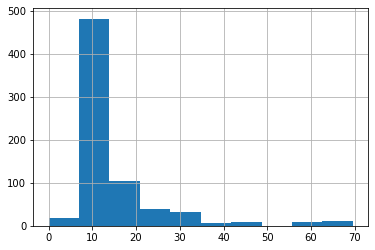

In [19]:
pc3['Fare'].hist()

In [20]:
# 平均數 易受極端高低值影響
# 眾數 可補上最多個數得值 以fare為例，相當合適
# 中位數 選擇所有票價中最中間之值 也相當不錯
